In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [58]:
# Head and tail
print("Train Head:\n", train.head())
print("Train Tail:\n", train.tail())
print("Test Head:\n", test.head())
print("Test Tail:\n", test.tail())


Train Head:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2      

In [59]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [60]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [61]:
train.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [62]:
test.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0   

Finding Missing Value

In [63]:
print("Missing values in Train:\n", train.isnull().sum())

Missing values in Train:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [64]:
print("Missing values in Test:\n", test.isnull().sum())

Missing values in Test:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Filling the missing value

In [65]:
# Fill categorical with mode (safe assignment)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

# Fill numerical with median (safe assignment)
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())


In [66]:
print("Missing values in Train:\n", train.isnull().sum())
print("Missing values in Test:\n", test.isnull().sum())

Missing values in Train:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values in Test:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


All missing valuehas been removed

Finding outliers in given dataset

In [67]:
def find_outliers_all_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = {
            'Total': df.shape[0],
            'Outliers': outlier_count,
            'Percentage': round(outlier_count / df.shape[0] * 100, 2),
            'Outlier_Values': outliers[col].tolist()[:5]  # Show sample values
        }
    
    return outlier_summary

# Run for training dataset
outlier_stats_train = find_outliers_all_columns(train)

# Display results
for col, stats in outlier_stats_train.items():
    print(f"\nColumn: {col}")
    print(f" - Total Values: {stats['Total']}")
    print(f" - Outliers Found: {stats['Outliers']} ({stats['Percentage']}%)")
    print(f" - Sample Outlier Values: {stats['Outlier_Values']}")



Column: ApplicantIncome
 - Total Values: 614
 - Outliers Found: 50 (8.14%)
 - Sample Outlier Values: [12841, 12500, 11500, 10750, 13650]

Column: CoapplicantIncome
 - Total Values: 614
 - Outliers Found: 18 (2.93%)
 - Sample Outlier Values: [10968.0, 8106.0, 7210.0, 8980.0, 7750.0]

Column: LoanAmount
 - Total Values: 614
 - Outliers Found: 41 (6.68%)
 - Sample Outlier Values: [267.0, 349.0, 315.0, 320.0, 286.0]

Column: Loan_Amount_Term
 - Total Values: 614
 - Outliers Found: 88 (14.33%)
 - Sample Outlier Values: [120.0, 240.0, 180.0, 180.0, 60.0]

Column: Credit_History
 - Total Values: 614
 - Outliers Found: 89 (14.5%)
 - Sample Outlier Values: [0.0, 0.0, 0.0, 0.0, 0.0]


Steps to remove outliers

In [68]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [69]:
# Create a copy to preserve original data
train_cleaned = train.copy()

# List of columns with outliers
outlier_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Remove outliers one by one
for col in outlier_columns:
    train_cleaned = remove_outliers_iqr(train_cleaned, col)

print(f" Train Original rows: {train.shape[0]}")
print(f"Train Cleaned rows: {train_cleaned.shape[0]}")


 Train Original rows: 614
Train Cleaned rows: 383


In [70]:
# Create a copy to preserve original data
test_cleaned = test.copy()

# List of columns with potential outliers (same as train)
outlier_columns_test = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Remove outliers
for col in outlier_columns_test:
    test_cleaned = remove_outliers_iqr(test_cleaned, col)

print(f"Original test rows: {test.shape[0]}")
print(f"Cleaned test rows: {test_cleaned.shape[0]}")


Original test rows: 367
Cleaned test rows: 235


Encode Categorial Features

In [71]:
from sklearn.preprocessing import LabelEncoder

# Copy cleaned data
train_encoded = train_cleaned.copy()
test_encoded = test_cleaned.copy()

# Label encode categorical features
label_encoders = {}

for col in train_encoded.columns:
    if train_encoded[col].dtype == "object" and col != "Loan_ID":
        le = LabelEncoder()
        train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
        if col in test_encoded.columns:
            test_encoded[col] = le.transform(test_encoded[col].astype(str))
        label_encoders[col] = le


Split Features and Target

In [73]:
# Define features and target
X_train = train_encoded.drop(columns=["Loan_ID", "Loan_Status"])
y_train = train_encoded["Loan_Status"]

# Ensure test doesn't include 'Loan_ID'
if "Loan_ID" in test_encoded.columns:
    X_test = test_encoded.drop(columns=["Loan_ID"])
else:
    X_test = test_encoded.copy()


Apply Ensemble Learning Models

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data for evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Dictionary to store fitted models
fitted_models = {}

# 1. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_split, y_train_split)
y_pred_rf = rf.predict(X_val_split)
fitted_models['Random Forest'] = (rf, y_pred_rf)

# 2. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_split, y_train_split)
y_pred_gb = gb.predict(X_val_split)
fitted_models['Gradient Boosting'] = (gb, y_pred_gb)

# 3. AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_split, y_train_split)
y_pred_ada = ada.predict(X_val_split)
fitted_models['AdaBoost'] = (ada, y_pred_ada)

# 4. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_split, y_train_split)
y_pred_xgb = xgb.predict(X_val_split)
fitted_models['XGBoost'] = (xgb, y_pred_xgb)

# 5. Hard Voting Classifier
voting_hard = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb), ('xgb', xgb)
], voting='hard')
voting_hard.fit(X_train_split, y_train_split)
y_pred_hard = voting_hard.predict(X_val_split)
fitted_models['Voting Classifier (Hard)'] = (voting_hard, y_pred_hard)

# 6. Soft Voting Classifier
voting_soft = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb), ('xgb', xgb)
], voting='soft')
voting_soft.fit(X_train_split, y_train_split)
y_pred_soft = voting_soft.predict(X_val_split)
fitted_models['Voting Classifier (Soft)'] = (voting_soft, y_pred_soft)

# Evaluation
for model_name, (model, y_pred) in fitted_models.items():
    print(f"\n🔍 Model: {model_name}")
    print("📊 Classification Report:")
    print(classification_report(y_val_split, y_pred))
    print(f"✅ Accuracy: {accuracy_score(y_val_split, y_pred):.4f}")
    print("🧾 Confusion Matrix:")
    print(confusion_matrix(y_val_split, y_pred))


C:\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Model: Random Forest
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.82      0.95      0.88        63

    accuracy                           0.79        77
   macro avg       0.54      0.51      0.50        77
weighted avg       0.72      0.79      0.74        77

✅ Accuracy: 0.7922
🧾 Confusion Matrix:
[[ 1 13]
 [ 3 60]]

🔍 Model: Gradient Boosting
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.07      0.10        14
           1       0.82      0.92      0.87        63

    accuracy                           0.77        77
   macro avg       0.49      0.50      0.48        77
weighted avg       0.70      0.77      0.73        77

✅ Accuracy: 0.7662
🧾 Confusion Matrix:
[[ 1 13]
 [ 5 58]]

🔍 Model: AdaBoost
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.17      

C:\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


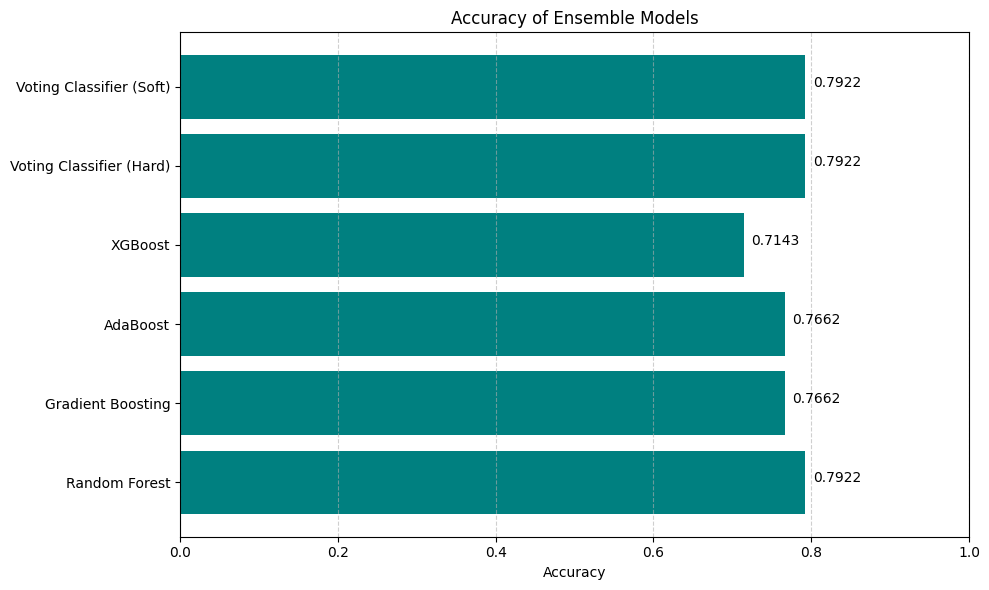

In [77]:
import matplotlib.pyplot as plt

# Collecting accuracies
accuracies = {}
for model_name, (_, y_pred) in fitted_models.items():
    acc = accuracy_score(y_val_split, y_pred)
    accuracies[model_name] = acc

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='teal')
plt.xlabel('Accuracy')
plt.title('Accuracy of Ensemble Models')
plt.xlim(0, 1)
for index, value in enumerate(accuracies.values()):
    plt.text(value + 0.01, index, f'{value:.4f}')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


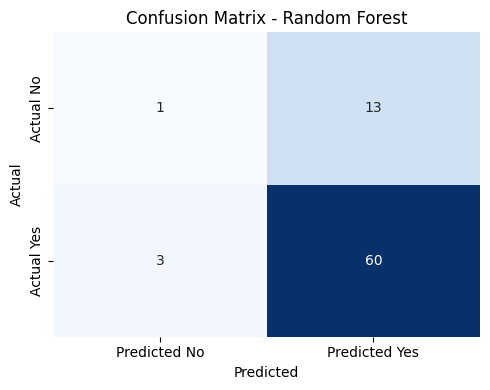

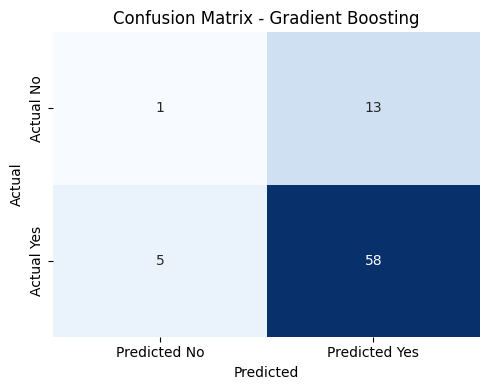

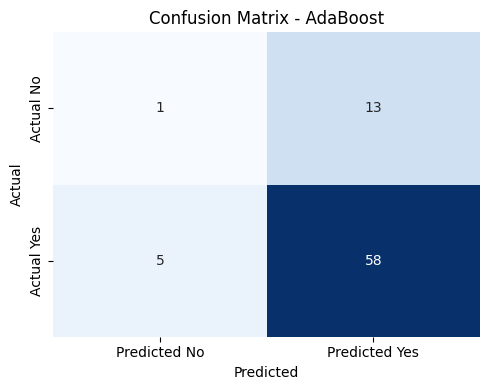

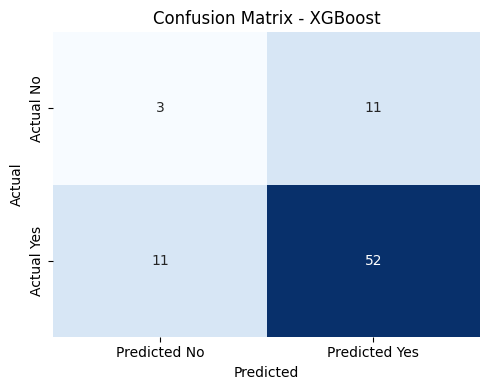

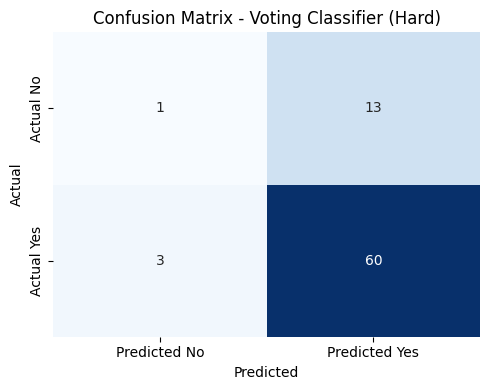

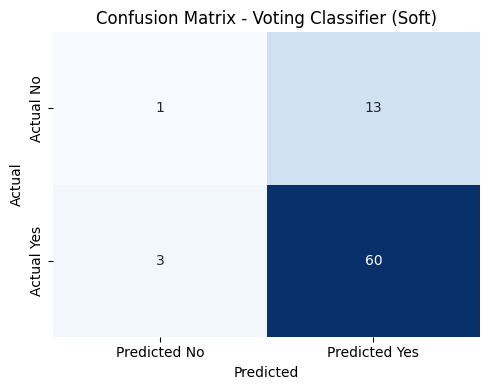

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for each model
for model_name, (_, y_pred) in fitted_models.items():
    cm = confusion_matrix(y_val_split, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\1904575378.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


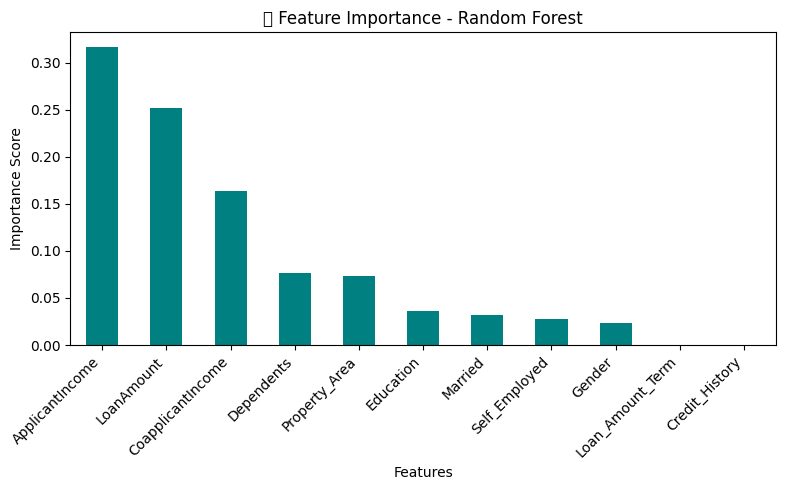

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\1904575378.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


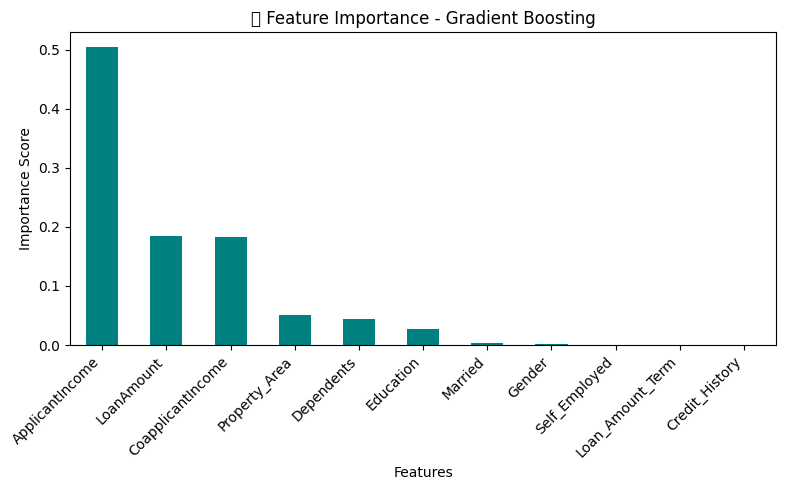

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\1904575378.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


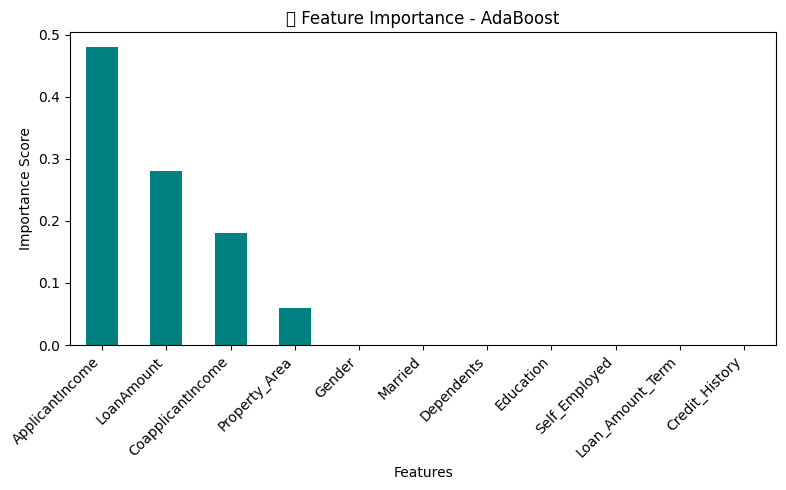

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18444\1904575378.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


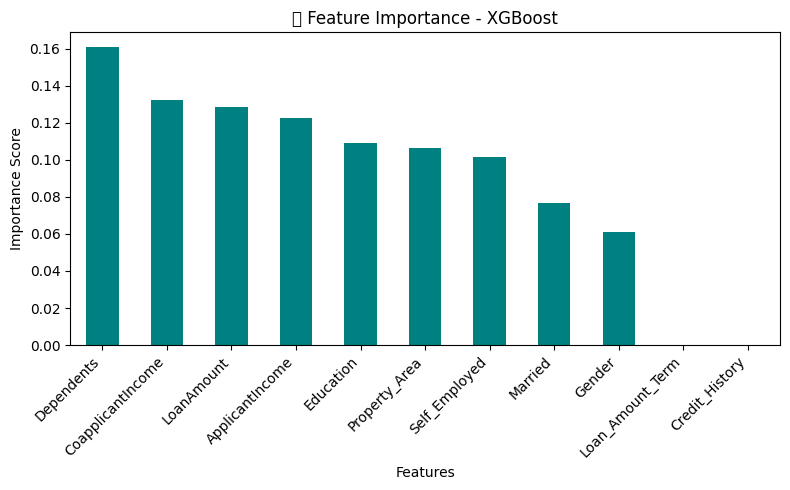

In [79]:
# Plot feature importances
importances_models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'AdaBoost': ada,
    'XGBoost': xgb
}

importances_df = {}

for model_name, model in importances_models.items():
    try:
        importances = model.feature_importances_
        importances_df[model_name] = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
        
        # Plot
        plt.figure(figsize=(8, 5))
        importances_df[model_name].plot(kind='bar', color='teal')
        plt.title(f'📊 Feature Importance - {model_name}')
        plt.ylabel('Importance Score')
        plt.xlabel('Features')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
    except AttributeError:
        print(f"⚠️ Feature importance not available for {model_name}")
